## Week 3 Take-home Assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [3]:
print(df.shape)
df.sample(5)

(16057, 12)


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
11806,11/12/2017 06:00:00 AM,Brooklyn Bridge,38,23,15,clear-night,30.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
7689,11/11/2019 05:00:00 AM,Brooklyn Bridge,0,0,0,clear-night,43.0,0.0,40.708164,-73.999509,Veterans Day,"(40.7081639691088, -73.9995087014816)"
13883,02/09/2018 05:00:00 PM,Brooklyn Bridge,709,374,335,partly-cloudy-day,34.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2318,04/01/2019 04:00:00 AM,Brooklyn Bridge,0,0,0,clear-night,35.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
13328,05/01/2018 09:00:00 AM,Brooklyn Bridge,886,489,397,clear-day,56.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_beginning     16057 non-null  object 
 1   location           16057 non-null  object 
 2   Pedestrians        16057 non-null  int64  
 3   Towards Manhattan  16057 non-null  int64  
 4   Towards Brooklyn   16057 non-null  int64  
 5   weather_summary    16041 non-null  object 
 6   temperature        16041 non-null  float64
 7   precipitation      16041 non-null  float64
 8   lat                16057 non-null  float64
 9   long               16057 non-null  float64
 10  events             1124 non-null   object 
 11  Location1          16057 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.5+ MB


In [8]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df.info()
df.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hour_beginning     16057 non-null  datetime64[ns]
 1   location           16057 non-null  object        
 2   Pedestrians        16057 non-null  int64         
 3   Towards Manhattan  16057 non-null  int64         
 4   Towards Brooklyn   16057 non-null  int64         
 5   weather_summary    16041 non-null  object        
 6   temperature        16041 non-null  float64       
 7   precipitation      16041 non-null  float64       
 8   lat                16057 non-null  float64       
 9   long               16057 non-null  float64       
 10  events             1124 non-null   object        
 11  Location1          16057 non-null  object        
 12  hour               16057 non-null  int32         
 13  month              16057 non-null  int32         
 14  date  

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
9021,2018-01-11 11:00:00,Brooklyn Bridge,755,346,409,partly-cloudy-day,43.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",11,1,2018-01-11,Thursday


In [9]:
df['hour'] = df['hour_beginning'].dt.hour
df['month'] = df['hour_beginning'].dt.month
df['date'] = df['hour_beginning'].dt.date
df['day_name'] = df['hour_beginning'].dt.day_name()

df.sample()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
13178,2018-04-17 09:00:00,Brooklyn Bridge,444,248,196,partly-cloudy-day,42.0,0.0004,40.708164,-73.999509,Tax Day,"(40.7081639691088, -73.9995087014816)",9,4,2018-04-17,Tuesday


In [11]:
df = df.sort_values(by='hour_beginning') #Arranging data in chronological order first and then proceeding to forward/back fill
df.reset_index(drop=True, inplace=True)  #drop=True discards the current index, inplace=True applies changes to the df
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday


In [12]:
df[df['temperature'].isnull()].shape

(16, 16)

In [14]:
df['temperature'] = df['temperature'].fillna(method="ffill")
df['precipitation'] = df['precipitation'].fillna(method="ffill")
df['weather_summary'] = df['weather_summary'].fillna(method="ffill")

df.isnull().sum()

hour_beginning           0
location                 0
Pedestrians              0
Towards Manhattan        0
Towards Brooklyn         0
weather_summary          0
temperature              0
precipitation            0
lat                      0
long                     0
events               14933
Location1                0
hour                     0
month                    0
date                     0
day_name                 0
dtype: int64

1. Filter the data to include only weekdays (Monday to Friday) and
plot a line graph showing the pedestrian counts for each day of the
week.

In [18]:
df.shape

(16057, 16)

In [17]:
df_weekday = df[~df['day_name'].isin(["Saturday", "Sunday"])]
print(df_weekday.shape)
df_weekday.sample(5)

(11472, 16)


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
7884,2019-01-25 12:00:00,Brooklyn Bridge,1207,624,583,partly-cloudy-day,38.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",12,1,2019-01-25,Friday
2560,2018-01-15 16:00:00,Brooklyn Bridge,955,407,548,clear-day,30.0,0.0,40.708164,-73.999509,Martin Luther King Jr. Day,"(40.7081639691088, -73.9995087014816)",16,1,2018-01-15,Monday
14550,2019-10-30 06:00:00,Brooklyn Bridge,10,9,1,cloudy,58.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",6,10,2019-10-30,Wednesday
14101,2019-10-11 13:00:00,Brooklyn Bridge,2234,938,1296,cloudy,61.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",13,10,2019-10-11,Friday
5293,2018-05-09 13:00:00,Brooklyn Bridge,1729,755,974,clear-day,71.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",13,5,2018-05-09,Wednesday


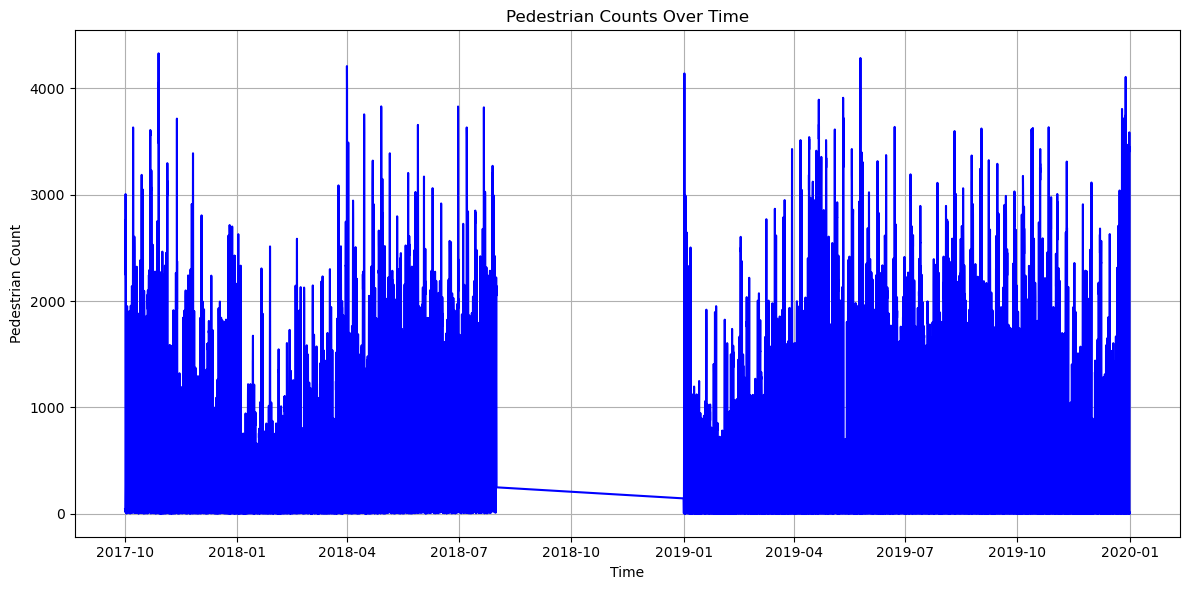

In [21]:
# Plotting a line plot of pedestrian counts over time
plt.figure(figsize=(12, 6))
plt.plot(df['hour_beginning'], df['Pedestrians'], color='blue')
plt.title('Pedestrian Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.tight_layout()
plt.show()